Selected ads: ['A', 'C', 'E']
Total Profit: 142


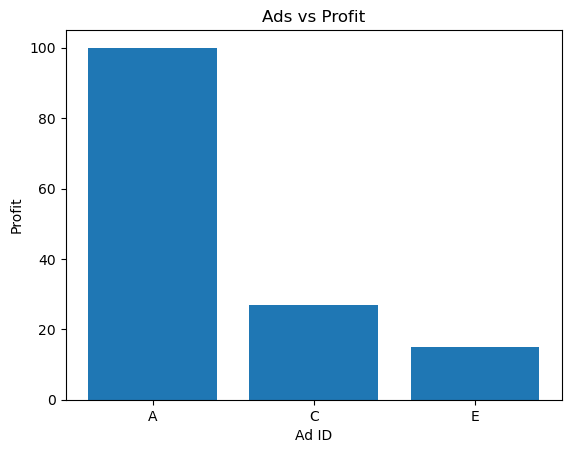

Maximum Profit: 7


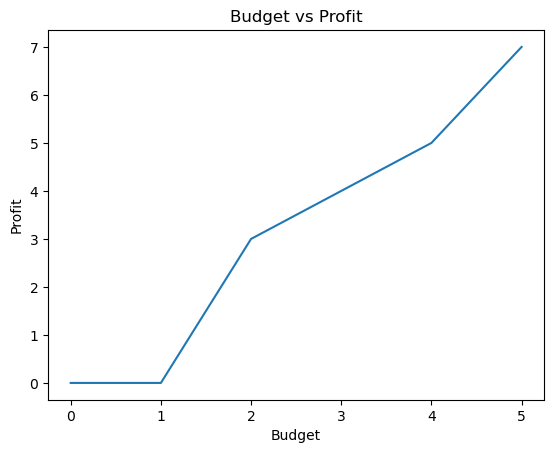

Password found: ab
Attempts: 8
Time: 0.0


In [7]:
 # Problem 1 – TV Commercial Scheduling (Greedy)
ads = [{'id': 'A', 'deadline': 2, 'profit': 100},
       {'id': 'B', 'deadline': 1, 'profit': 19},
       {'id': 'C', 'deadline': 2, 'profit': 27},
       {'id': 'D', 'deadline': 1, 'profit': 25},
       {'id': 'E', 'deadline': 3, 'profit': 15}]

# Greedy job sequencing
ads.sort(key=lambda x: x['profit'], reverse=True)
max_deadline = max(ad['deadline'] for ad in ads)
slots = [-1]*max_deadline
profit, result = 0, []

for ad in ads:
    for j in range(ad['deadline']-1, -1, -1):
        if slots[j] == -1:
            slots[j] = ad['id']
            profit += ad['profit']
            result.append(ad['id'])
            break

print("Selected ads:", result)
print("Total Profit:", profit)

# Visualization
plt.bar(result, [a['profit'] for a in ads if a['id'] in result])
plt.title("Ads vs Profit")
plt.xlabel("Ad ID")
plt.ylabel("Profit")
plt.show()

# 3. Problem 2 – Knapsack (Dynamic Programming)
weights = [2, 3, 4, 5]
profits = [3, 4, 5, 6]
capacity = 5
n = len(weights)

dp = [[0]*(capacity+1) for _ in range(n+1)]
for i in range(1, n+1):
    for w in range(1, capacity+1):
        if weights[i-1] <= w:
            dp[i][w] = max(profits[i-1] + dp[i-1][w-weights[i-1]], dp[i-1][w])
        else:
            dp[i][w] = dp[i-1][w]
print("Maximum Profit:", dp[n][capacity])

# Visualization
plt.plot(range(capacity+1), dp[n])
plt.title("Budget vs Profit")
plt.xlabel("Budget")
plt.ylabel("Profit")
plt.show()

# 4. Problem 3 – Sudoku Solver (Backtracking)
def is_safe(grid, row, col, num):
    for x in range(9):
        if grid[row][x] == num or grid[x][col] == num:
            return False
    startRow, startCol = row - row % 3, col - col % 3
    for i in range(3):
        for j in range(3):
            if grid[i+startRow][j+startCol] == num:
                return False
    return True

def solve_sudoku(grid, row=0, col=0):
    if row == 8 and col == 9:
        return True
    if col == 9:
        row += 1
        col = 0
    if grid[row][col] > 0:
        return solve_sudoku(grid, row, col+1)
    for num in range(1, 10):
        if is_safe(grid, row, col, num):
            grid[row][col] = num
            if solve_sudoku(grid, row, col+1):
                return True
        grid[row][col] = 0
    return False

# 5. Problem 4 – Password Cracking (Brute Force)
import itertools, string

def crack_password(target, charset):
    attempts = 0
    start = time.time()
    for length in range(1, len(target)+1):
        for combo in itertools.product(charset, repeat=length):
            attempts += 1
            if ''.join(combo) == target:
                print("Password found:", ''.join(combo))
                print("Attempts:", attempts)
                print("Time:", time.time()-start)
                return

crack_password("ab", "abc123")